In [28]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import random
import string
from bitarray import bitarray

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Задание 2.
Используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.
Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). 
Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте  предварительно применить к признакам standard scaling.

In [37]:
def get_logreg(X, y, alpha):
    clf = LogisticRegression(C=alpha, n_jobs = -1)
    clf.fit(X, y)
    return (clf.decision_function(X))

In [3]:
data = load_breast_cancer()

In [8]:
X = data.data
y = data.target

In [14]:
stan = StandardScaler()
X = stan.fit_transform(X)

In [53]:
X.shape

(569, 30)

In [44]:
m_rdm = []
std_rdm = []
for alpha in np.logspace(-2, 2, 5):
    
    rad = []
    for n in tqdm(range(100)):
        asd = []
        for i in range(123):
            r = np.random.uniform(-1, 1, X.shape[0])
            asd.append(np.abs(np.sum(r*get_logreg(X, y, alpha))))
        rad.append(max(asd)/X.shape[0])
    m_rdm.append(np.mean(np.array(rad)))
    std_rdm.append(np.std(np.array(rad))) 
    

A Jupyter Widget

C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [47]:
m_rdm

[0.20556975959930504,
 0.39384606341265527,
 0.6817611422764657,
 1.05780422744838,
 1.708973008620695]

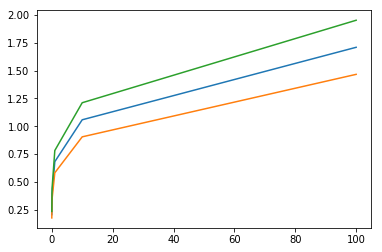

In [51]:
plt.plot(np.logspace(-2, 2, 5), m_rdm) #blue
plt.plot(np.logspace(-2, 2, 5), np.array(m_rdm) - np.array(std_rdm)) #orange
plt.plot(np.logspace(-2, 2, 5), np.array(m_rdm) + np.array(std_rdm)) #green

Задание 1.
Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке

In [85]:
def is_prime():
    primes = []
    for a in range(100, 1000):
        if all(a % i for i in range(2, a)) is True and a not in primes:
            primes.append(a)
    return(random.sample(primes, 10))

In [31]:
def rand_lines(l):
    lines = []
    for i in range(1000):
        line = ''.join(random.choice(string.ascii_lowercase) for _ in range(l))
        lines.append(line)
    return (lines)

In [17]:
def hash_int(x, p, a=456, b=7):
    return (a*x + b) % p

In [27]:
def poly_hash(line, p):
    h = 0
    x = 45
    for i in range(0, len(line)):
        h = (h * x + ord(line[i]) + p) % p
    return hash_int(h, p)

In [88]:
L = np.linspace(10, 100, 11)
primes = is_prime()
primes.sort()

In [95]:
L

array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.])

In [96]:
primes

[103, 113, 227, 433, 443, 691, 757, 857, 877, 947]

Фиксируем p. Смотрим зависимость от длины строк.

In [99]:
mean_L = []
std_L = []
p = random.choice(primes)
fpr_L = []
for l in L:
    add = []
    for i in range(10): #для mean и std. Для простого замера записываем только последний результат.
        f = 0
        lines = rand_lines(int(l))
        bitarr = bitarray('0' * p)

        for line in lines:
            has = poly_hash(line, p)

            if bitarr[has] == 0: 
                bitarr[has] = 1
            elif bitarr[has] == 1:
                f += 1
        add.append(f * 2 / (1000 * (1000 - 1)))
    mean_L.append(np.mean(add))
    std_L.append(np.std(add))        
    fpr_L.append(f * 2 / (1000 * (1000 - 1)))

In [100]:
fpr_L

[0.0015495495495495496,
 0.0015535535535535535,
 0.0015515515515515516,
 0.0015575575575575576,
 0.0015515515515515516,
 0.0015535535535535535,
 0.0015515515515515516,
 0.0015495495495495496,
 0.0015515515515515516,
 0.0015535535535535535,
 0.0015535535535535535]

In [102]:
mean_L

[0.0015533533533533535,
 0.001552152152152152,
 0.0015527527527527526,
 0.0015533533533533535,
 0.0015537537537537538,
 0.0015531531531531532,
 0.0015545545545545545,
 0.001551951951951952,
 0.0015533533533533535,
 0.0015539539539539539,
 0.0015539539539539539]

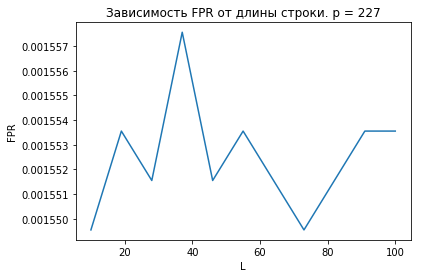

In [104]:
plt.title('Зависимость FPR от длины строки. p = ' + str(p))
plt.xlabel('L')
plt.ylabel('FPR')
plt.plot(L, fpr_L);

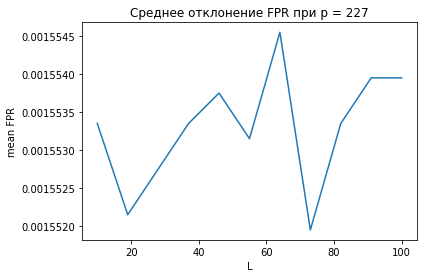

In [103]:
plt.title('Cреднее отклонение FPR при p = ' + str(p))
plt.xlabel('L')
plt.ylabel('mean FPR')
plt.plot(L, mean_L);

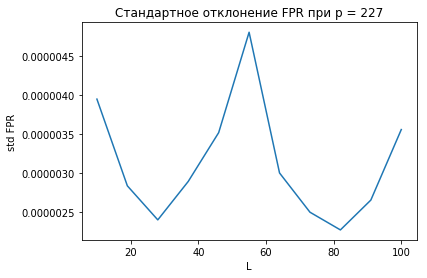

In [106]:
plt.title('Стандартное отклонение FPR при p = ' + str(p))
plt.xlabel('L')
plt.ylabel('std FPR')
plt.plot(L, std_L);

Фиксируем L. Смотрим зависимость от длины строк.

In [107]:
mean_p = []
std_p = []
l = random.choice(L)
fpr_p = []
for p in primes:
    add = []
    for i in range(10): #для mean и std. Для простого замера записываем только последний результат.
        f = 0
        lines = rand_lines(int(l))
        bitarr = bitarray('0' * p)

        for line in lines:
            has = poly_hash(line, p)

            if bitarr[has] == 0: 
                bitarr[has] = 1
            elif bitarr[has] == 1:
                f += 1
        add.append(f * 2 / (1000 * (1000 - 1)))
    mean_p.append(np.mean(add))
    std_p.append(np.std(add))        
    fpr_p.append(f * 2 / (1000 * (1000 - 1)))

In [108]:
fpr_p

[0.0017957957957957958,
 0.0017757757757757757,
 0.0015535535535535535,
 0.0012192192192192193,
 0.0012192192192192193,
 0.000954954954954955,
 0.0008808808808808808,
 0.0007987987987987988,
 0.0007967967967967968,
 0.0008068068068068068]

In [110]:
mean_p

[0.001795795795795796,
 0.001775775775775776,
 0.0015523523523523523,
 0.001226026026026026,
 0.0012060060060060062,
 0.000946146146146146,
 0.0008906906906906908,
 0.0008114114114114114,
 0.0008054054054054055,
 0.0007601601601601602]

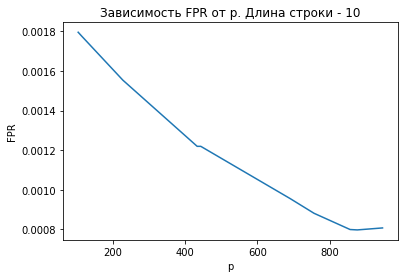

In [113]:
plt.title('Зависимость FPR от p. Длина строки - ' + str(int(l)))
plt.xlabel('p')
plt.ylabel('FPR')
plt.plot(primes, fpr_p);

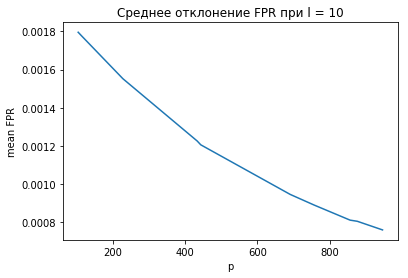

In [112]:
plt.title('Cреднее отклонение FPR при l = ' + str(int(l)))
plt.xlabel('p')
plt.ylabel('mean FPR')
plt.plot(primes, mean_p);

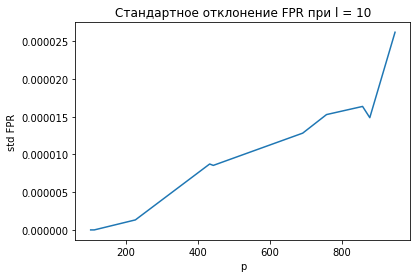

In [111]:
plt.title('Стандартное отклонение FPR при l = ' + str(int(l)))
plt.xlabel('p')
plt.ylabel('std FPR')
plt.plot(primes, std_p);